In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math


import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

import pandas as pd
import math
import numpy as np
from scipy.optimize import curve_fit
#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems

In [14]:
al = ['al 0.02.csv','al 0.04.csv','al 0.06.csv','al 0.08.csv','al 0.1.csv']
al_dt_peak,al_dt_back = [0]*20,[0]*20
back = pd.read_csv('part 2 no film.csv')
avg_b = back.mean()
print(avg_b)

for j,i in enumerate(al): 
    temp = pd.read_csv(i)
    al_dt_peak[j] = temp['peak']/(1 - (90*10**(-9) * temp['peak']))
    al_dt_back[j] = temp['background']#/(1 - (90*10**(-9) * temp['background']))
    
#print(back)
#print(al_dt_peak)

peak angle    1036.75
background     115.50
dtype: float64


In [ ]:
zinc = ['zinc 0.025.csv','zinc 0.05.csv','zinc 0.075.csv','zinc 0.1.csv']
zn_dt_peak,zn_dt_back = [0]*20,[0]*20

for j,i in enumerate(zinc): 
    temp = pd.read_csv(i)
    zn_dt_peak[j] = temp['peak']/(1 - (90*10**(-9) * temp['peak']))
    zn_dt_back[j] = temp['background']#/(1 - (90*10**(-9) * temp['background']))

-9.049247302178578 -9.792003897551142


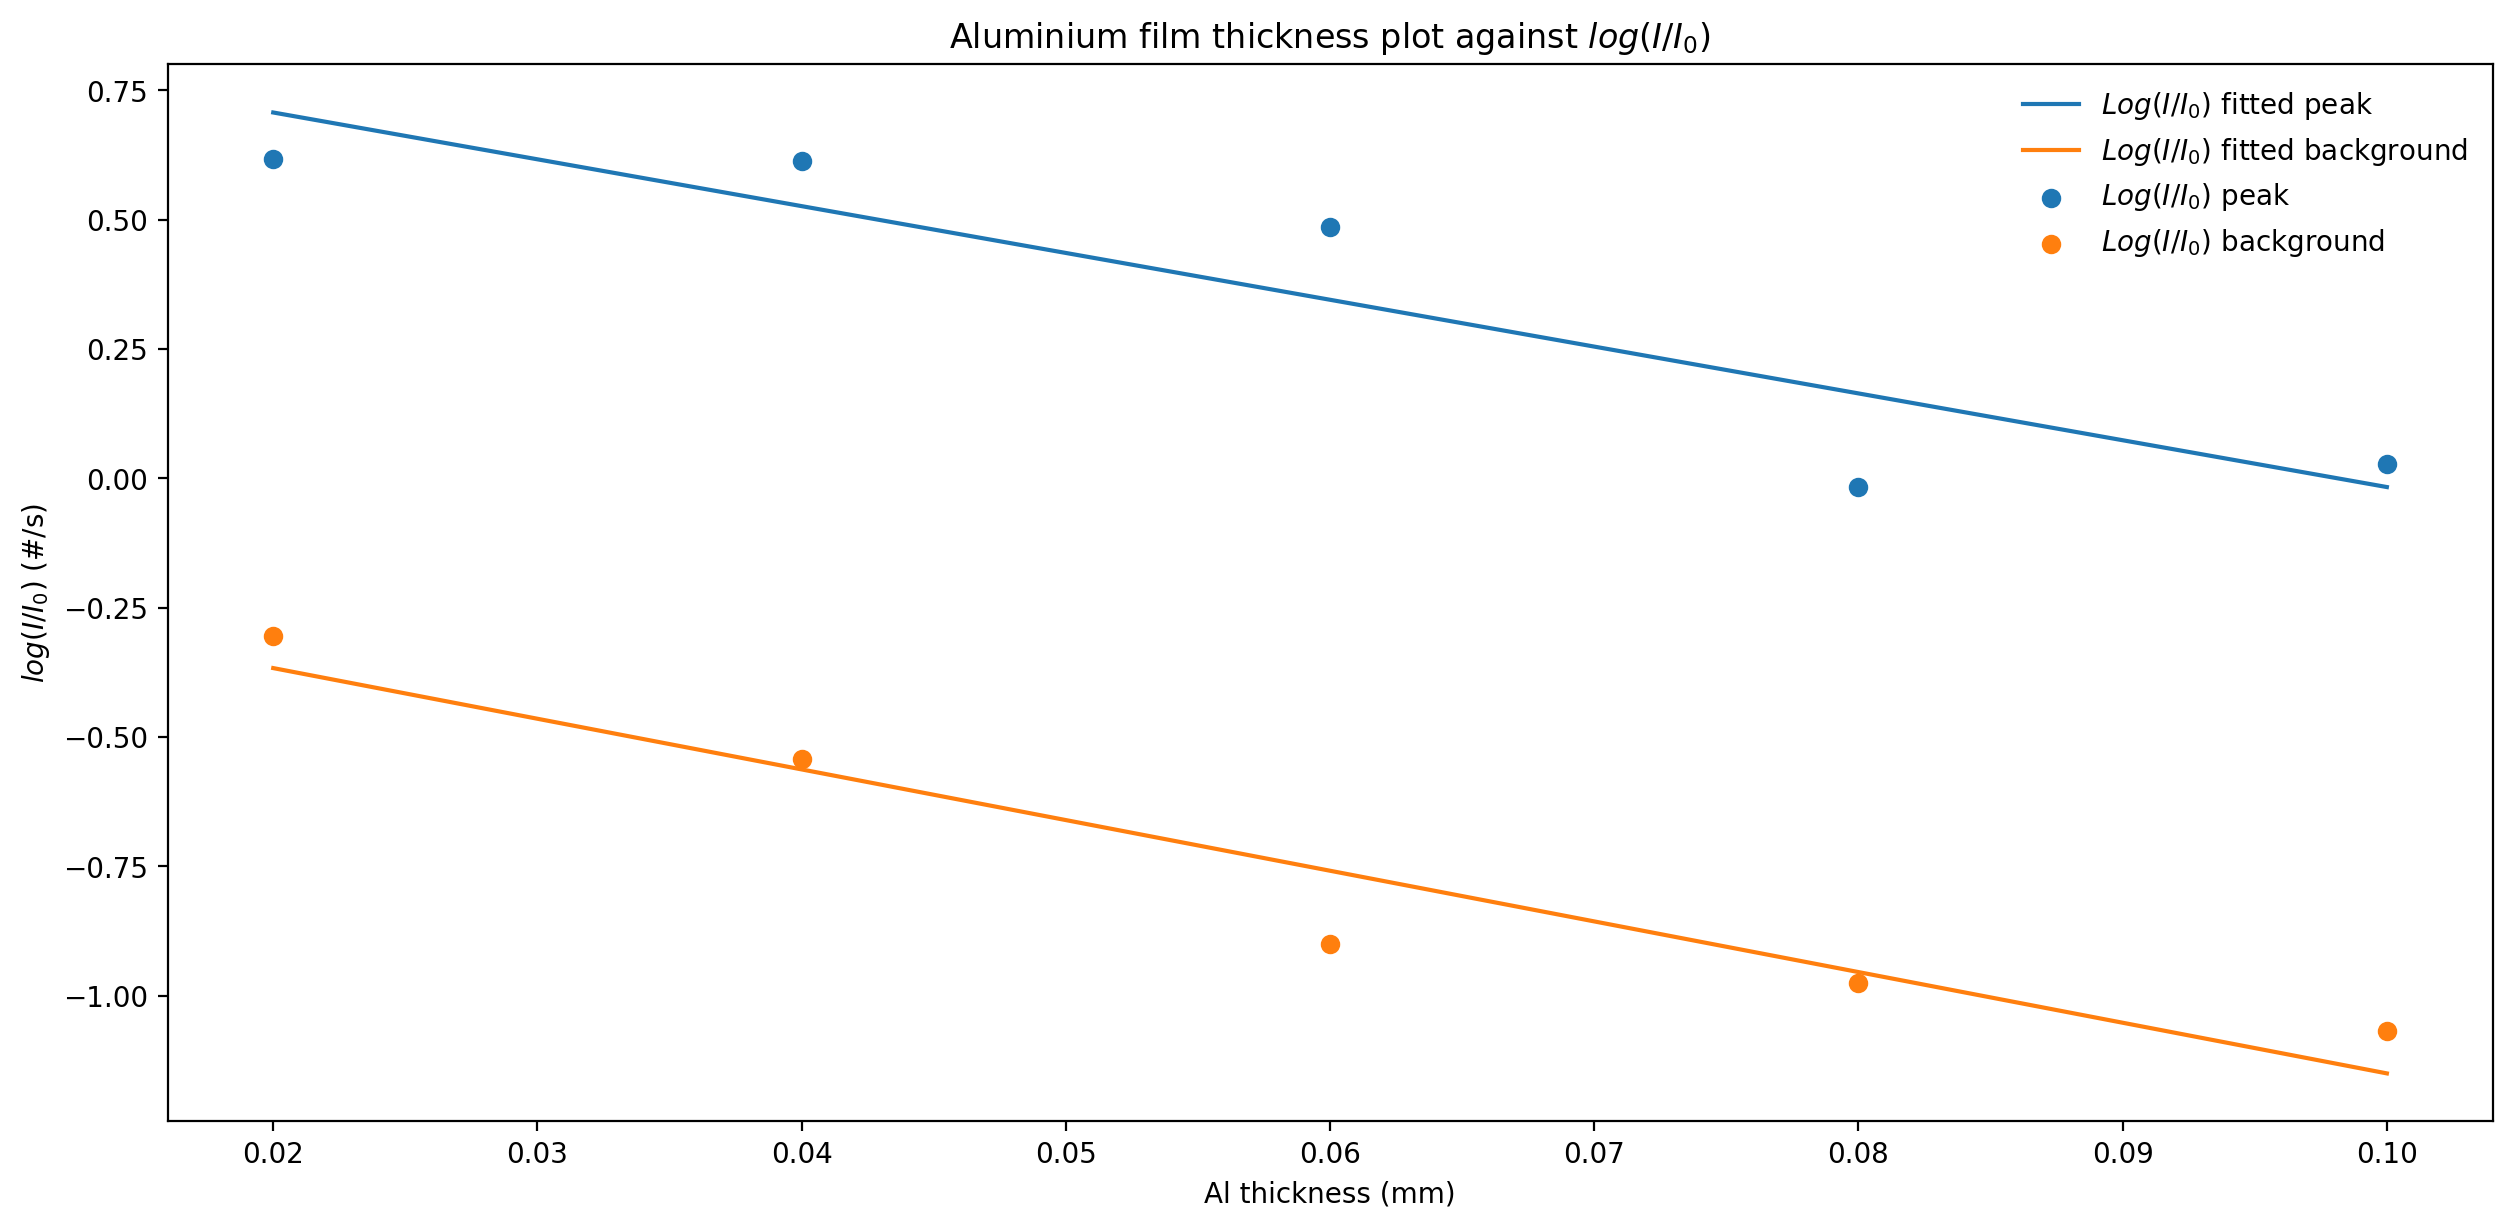

In [15]:
#peak angle 20.3
#background angle 24.5

x_plot_al = np.array([0.02, 0.04, 0.06, 0.08, 0.1])
y_plot_al_peak = [np.log(np.mean(al_dt_peak[i])/(avg_b['peak angle'])) for i in range(len(x_plot_al))]
y_plot_al_back = [np.log(np.mean(al_dt_back[i])/(avg_b['background'])) for i in range(len(x_plot_al))]

m_al_peak,b_al_peak = np.polyfit(x_plot_al,y_plot_al_peak,1)
m_al_back,b_al_back = np.polyfit(x_plot_al,y_plot_al_back,1)
#y_fit_al_peak = m_al_peak * x_plot_al
#print(b_al_peak)

fig,ax = plt.subplots(1, figsize = (15,7))
ax.set_title('Aluminium film thickness plot against $log(I/I_0)$')
ax.scatter(x_plot_al,y_plot_al_peak, label = '$Log(I/I_0)$ peak')
ax.set_xlabel('Al thickness (mm)')
ax.set_ylabel('$log(I/I_0)$ (#/s)')
ax.plot(x_plot_al,(m_al_peak*x_plot_al) + b_al_peak, label = '$Log(I/I_0)$ fitted peak')
ax.scatter(x_plot_al,y_plot_al_back, label = '$Log(I/I_0)$ background')
ax.plot(x_plot_al,(m_al_back*x_plot_al) + b_al_back, label = '$Log(I/I_0)$ fitted background')

ax.legend()
print(m_al_peak,m_al_back)

In [25]:
zn_peak = [3880,1530,572,203]
zn_peak = [i/(1 - (90*(10**(-9)) * i)) for i in zn_peak]
zn_back = [16,4,2,1]
y_plott_zn_peak = np.log(zn_peak/avg_b['peak angle'])
y_plott_zn_back = np.log(zn_back/avg_b['background'])

-39.34446633737004 -36.043653389117146


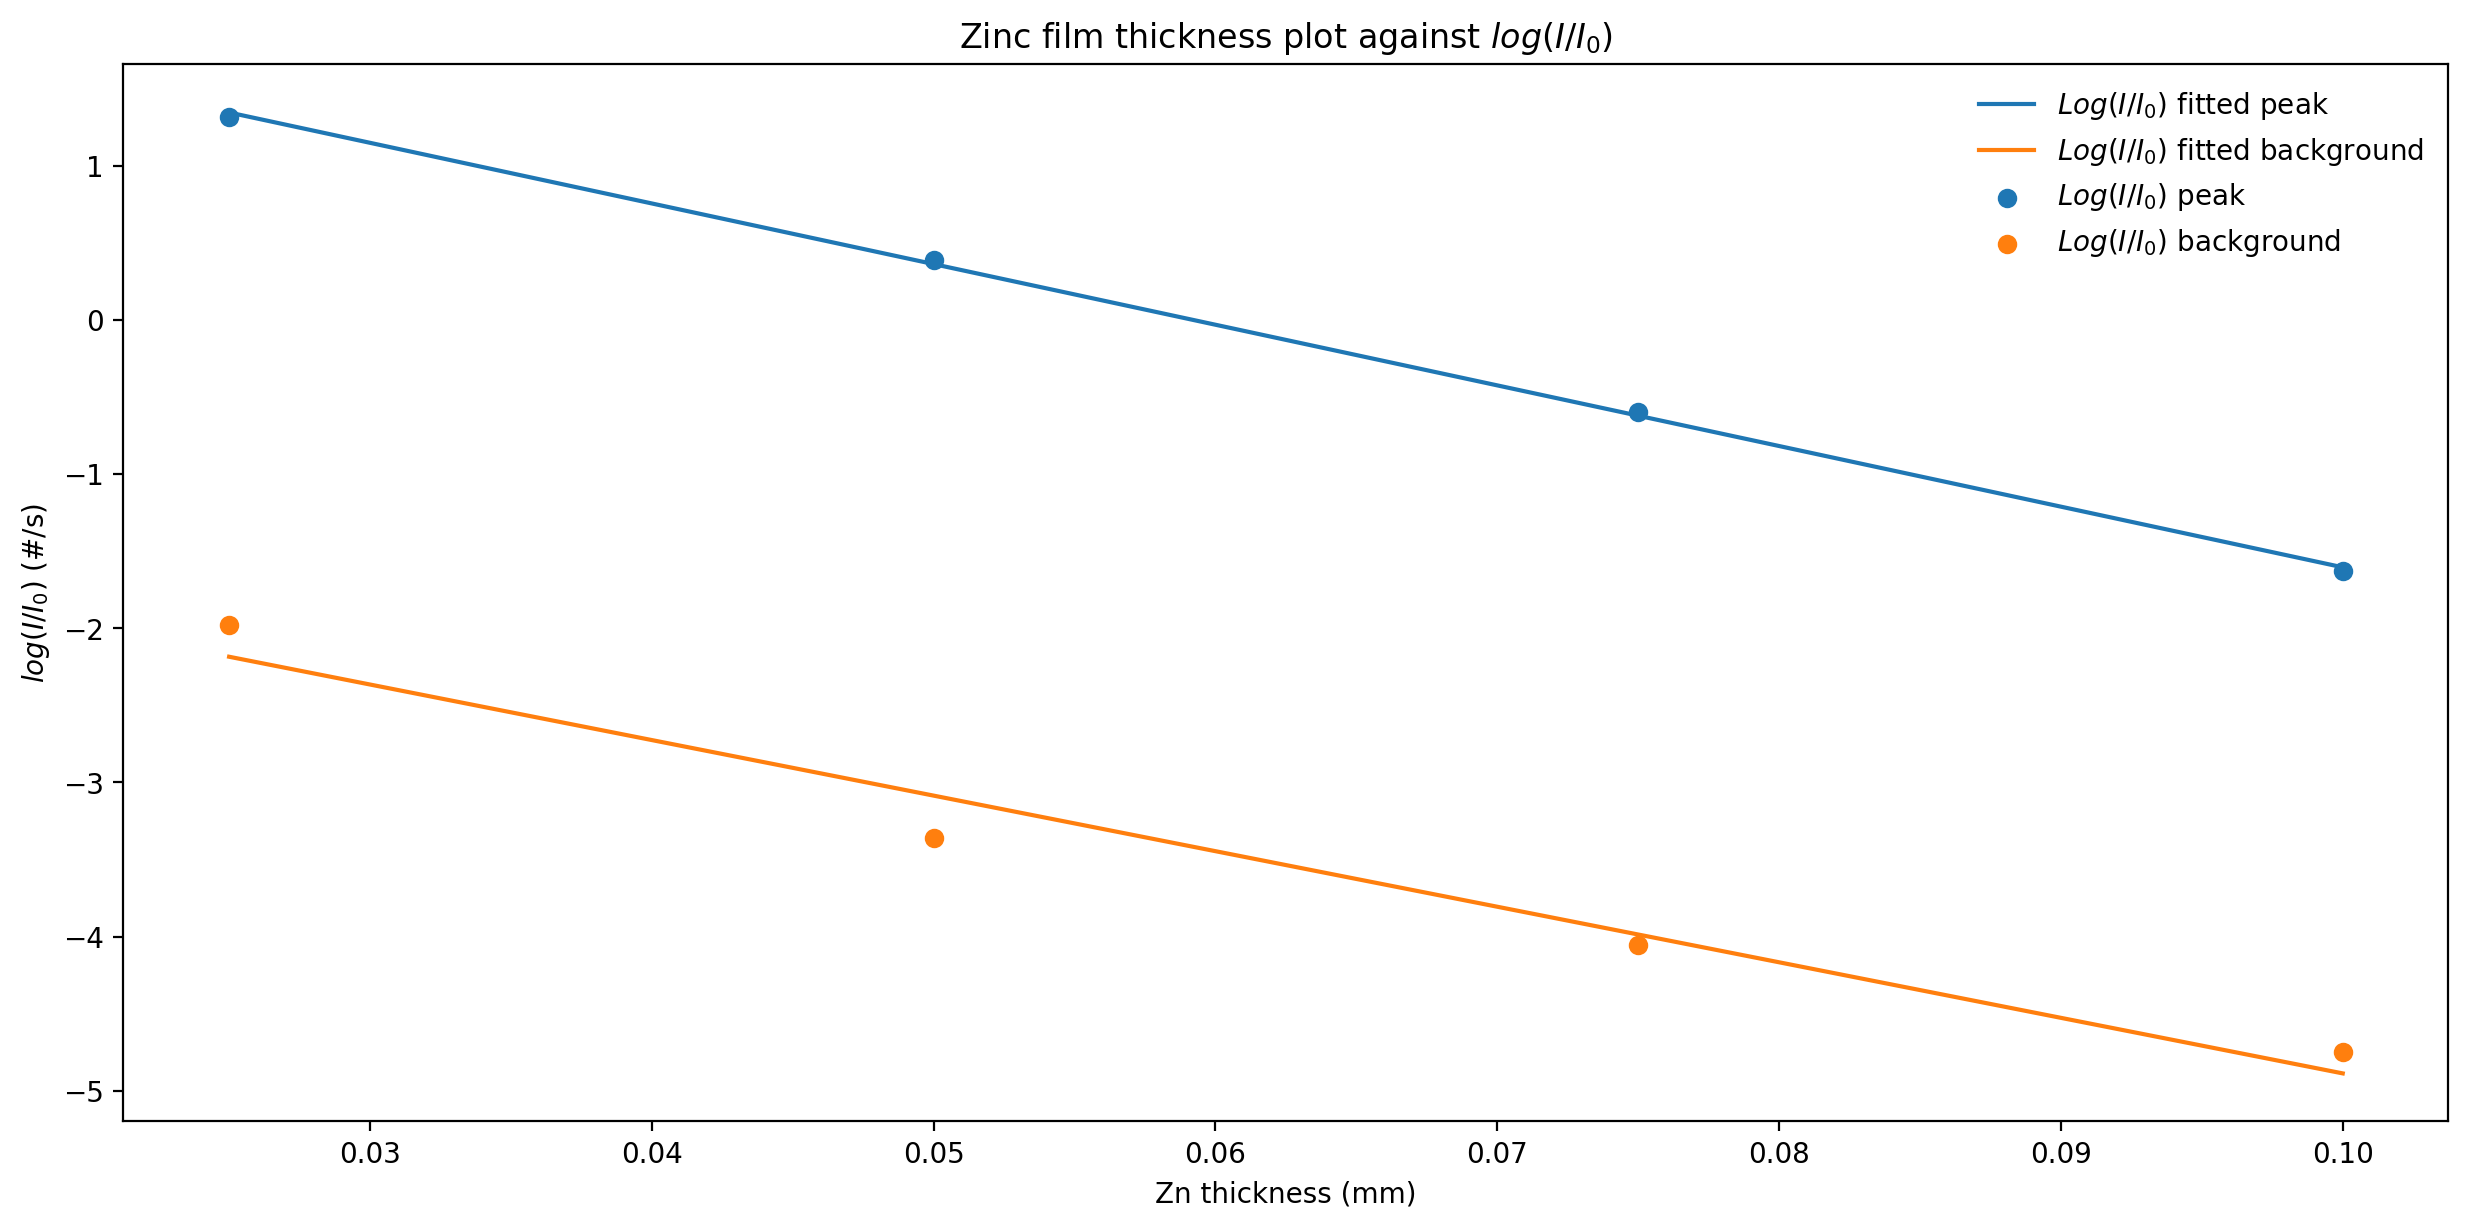

In [26]:
x_plot_zn = np.array([0.025, 0.05, 0.075, 0.1])
#y_plot_zn_peak = [np.log(np.mean(zn_dt_peak[i])/(avg_b['peak'])) for i in range(len(x_plot_zn))]
#y_plot_zn_back = [np.log(np.mean(zn_dt_back[i])/(avg_b['background'])) for i in range(len(x_plot_zn))]

m_zn_peak,b_zn_peak = np.polyfit(x_plot_zn,y_plott_zn_peak,1)
m_zn_back,b_zn_back = np.polyfit(x_plot_zn,y_plott_zn_back,1)
#y_fit_al_peak = m_al_peak * x_plot_al
#print(b_al_peak)

fig,ax = plt.subplots(1, figsize = (15,7))
ax.set_title('Zinc film thickness plot against $log(I/I_0)$')
ax.scatter(x_plot_zn,y_plott_zn_peak, label = '$Log(I/I_0)$ peak')
ax.set_xlabel('Zn thickness (mm)')
ax.set_ylabel('$log(I/I_0)$ (#/s)')
ax.plot(x_plot_zn,(m_zn_peak*x_plot_zn) + b_zn_peak, label = '$Log(I/I_0)$ fitted peak')
ax.scatter(x_plot_zn,y_plott_zn_back, label = '$Log(I/I_0)$ background')
ax.plot(x_plot_zn,(m_zn_back*x_plot_zn) + b_zn_back, label = '$Log(I/I_0)$ fitted background')

ax.legend()
print(m_zn_peak,m_zn_back)